# Testing and examples for aslmcg function

The function `aslmcg` computes adjoint spheroidals usiung a spherical harmonic expansion.

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
from matplotlib.pyplot import *
from numpy import *
from positive import *

(positive)>> Applying custom matplotlib settings.


In [2]:
?aslmcg

Signature:
aslmcg(
    a,
    s,
    l,
    m,
    n,
    theta,
    phi,
    kerr=True,
    lmin=None,
    lmax=None,
    span=6,
    full_output=False,
)
Docstring:
Compute adjoint spheroidal harmonic functoin using the spherical harmonic clensch-gordan method. By default, kerr adjoint functions are computed.
londonl@mit.edu 2020
File:      ~/JOKI/Libs/KOALA/positive_dev/positive/physics.py
Type:      function


In [26]:
a = 0.96
s,l,m,n = -2,4,4,0
theta = linspace(0,pi,int(2**9))[1:-1]
phi = 0

cw,A1 = leaver(a,l,m,n)
aw = a*cw

# Compute adjoint spheroidal using spheroidal expansion as a check
foo = slm_dual_set( a, l, m, n, theta, phi, s=s )

In [27]:
bar = aslmcg( a, s, l, m, n, theta, phi )

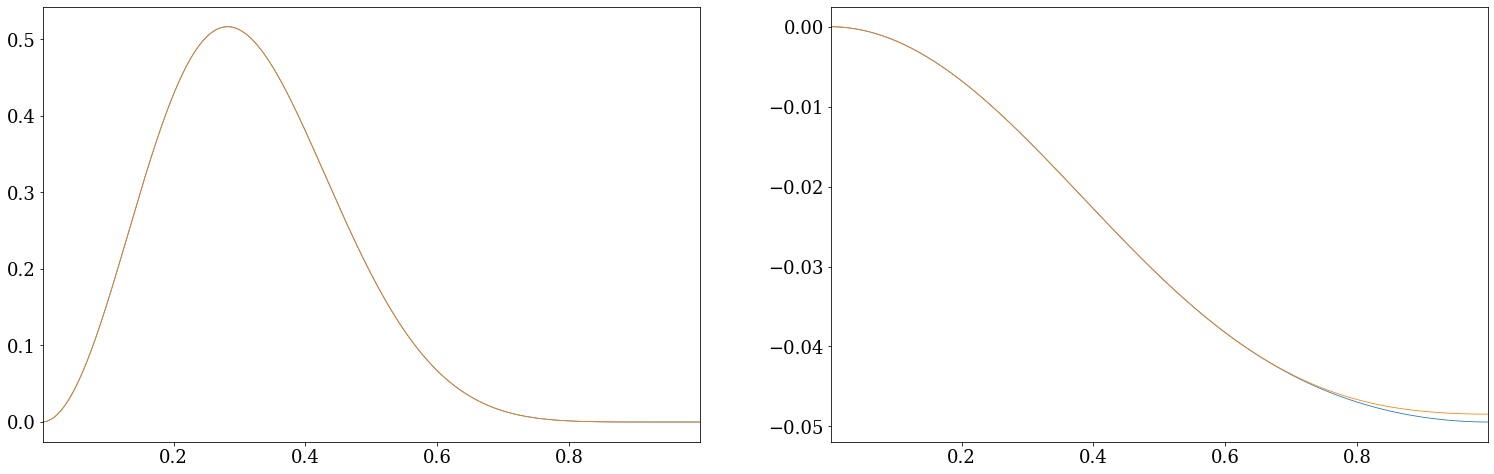

In [34]:

ll = l+0

aS1 = foo['AdjSlm'][ ll ]
aS2 = bar['AdjSlm'][ ll ]
u = theta/pi
pha = lambda x: unwrap( angle(x) )-unwrap( angle(x) )[0]

fig = figure( figsize=2*figaspect(0.618/2) )

subplot(1,2,1)
plot( u, abs(aS1) )
plot( u, abs(aS2) )
xlim( lim(u) )

subplot(1,2,2)
plot( u, pha(aS1) )
plot( u, pha(aS2) )
xlim( lim(u) );